tgb - 01/25/2022 - Checking consistency in time series when using inputs at t-dt

# Imports

In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import xarray as xr

In [2]:
fz = 12
lw = 4
siz = 100

plt.rc('text', usetex=False)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw

# Open datasets

In [3]:
path_folder = '/DFS-L/DATA/pritchard/tbeucler/SPCAM/SPCAM_PHYS/'

In [4]:
path_train = path_folder + '2022_01_10_TRAIN_For_Nando_t-dt.nc'

In [5]:
train_set = xr.open_dataset(path_train)

In [6]:
train_set

<xarray.Dataset>
Dimensions:    (sample: 47177728, var_names: 224)
Coordinates:
  * var_names  (var_names) object 'QBP' 'QBP' 'QBP' ... 'FLNSt-dt' 'PRECTt-dt'
    time       (sample) int64 ...
    lat        (sample) float64 ...
    lon        (sample) float64 ...
Dimensions without coordinates: sample
Data variables:
    vars       (sample, var_names) float32 ...

In [7]:
print(train_set['var_names'].values)

['QBP' 'QBP' 'QBP' 'QBP' 'QBP' 'QBP' 'QBP' 'QBP' 'QBP' 'QBP' 'QBP' 'QBP'
 'QBP' 'QBP' 'QBP' 'QBP' 'QBP' 'QBP' 'QBP' 'QBP' 'QBP' 'QBP' 'QBP' 'QBP'
 'QBP' 'QBP' 'QBP' 'QBP' 'QBP' 'QBP' 'TBP' 'TBP' 'TBP' 'TBP' 'TBP' 'TBP'
 'TBP' 'TBP' 'TBP' 'TBP' 'TBP' 'TBP' 'TBP' 'TBP' 'TBP' 'TBP' 'TBP' 'TBP'
 'TBP' 'TBP' 'TBP' 'TBP' 'TBP' 'TBP' 'TBP' 'TBP' 'TBP' 'TBP' 'TBP' 'TBP'
 'VBP' 'VBP' 'VBP' 'VBP' 'VBP' 'VBP' 'VBP' 'VBP' 'VBP' 'VBP' 'VBP' 'VBP'
 'VBP' 'VBP' 'VBP' 'VBP' 'VBP' 'VBP' 'VBP' 'VBP' 'VBP' 'VBP' 'VBP' 'VBP'
 'VBP' 'VBP' 'VBP' 'VBP' 'VBP' 'VBP' 'PS' 'SOLIN' 'SHFLX' 'LHFLX' 'PHQ'
 'PHQ' 'PHQ' 'PHQ' 'PHQ' 'PHQ' 'PHQ' 'PHQ' 'PHQ' 'PHQ' 'PHQ' 'PHQ' 'PHQ'
 'PHQ' 'PHQ' 'PHQ' 'PHQ' 'PHQ' 'PHQ' 'PHQ' 'PHQ' 'PHQ' 'PHQ' 'PHQ' 'PHQ'
 'PHQ' 'PHQ' 'PHQ' 'PHQ' 'PHQ' 'TPHYSTND' 'TPHYSTND' 'TPHYSTND' 'TPHYSTND'
 'TPHYSTND' 'TPHYSTND' 'TPHYSTND' 'TPHYSTND' 'TPHYSTND' 'TPHYSTND'
 'TPHYSTND' 'TPHYSTND' 'TPHYSTND' 'TPHYSTND' 'TPHYSTND' 'TPHYSTND'
 'TPHYSTND' 'TPHYSTND' 'TPHYSTND' 'TPHYSTND' 'TPHYSTND' 'TPHYS

In [36]:
print(train_set['var_names'][94:124])
PHQ_t = train_set['vars'][:,94:124]

<xarray.DataArray 'var_names' (var_names: 30)>
array(['PHQ', 'PHQ', 'PHQ', 'PHQ', 'PHQ', 'PHQ', 'PHQ', 'PHQ', 'PHQ', 'PHQ',
       'PHQ', 'PHQ', 'PHQ', 'PHQ', 'PHQ', 'PHQ', 'PHQ', 'PHQ', 'PHQ', 'PHQ',
       'PHQ', 'PHQ', 'PHQ', 'PHQ', 'PHQ', 'PHQ', 'PHQ', 'PHQ', 'PHQ', 'PHQ'],
      dtype=object)
Coordinates:
  * var_names  (var_names) object 'PHQ' 'PHQ' 'PHQ' 'PHQ' ... 'PHQ' 'PHQ' 'PHQ'


In [37]:
print(train_set['var_names'][159:189])
PHQ_tdt = train_set['vars'][:,159:189]

<xarray.DataArray 'var_names' (var_names: 30)>
array(['PHQt-dt', 'PHQt-dt', 'PHQt-dt', 'PHQt-dt', 'PHQt-dt', 'PHQt-dt',
       'PHQt-dt', 'PHQt-dt', 'PHQt-dt', 'PHQt-dt', 'PHQt-dt', 'PHQt-dt',
       'PHQt-dt', 'PHQt-dt', 'PHQt-dt', 'PHQt-dt', 'PHQt-dt', 'PHQt-dt',
       'PHQt-dt', 'PHQt-dt', 'PHQt-dt', 'PHQt-dt', 'PHQt-dt', 'PHQt-dt',
       'PHQt-dt', 'PHQt-dt', 'PHQt-dt', 'PHQt-dt', 'PHQt-dt', 'PHQt-dt'],
      dtype=object)
Coordinates:
  * var_names  (var_names) object 'PHQt-dt' 'PHQt-dt' ... 'PHQt-dt' 'PHQt-dt'


In [38]:
print(train_set['var_names'][124:154])
TPHYSTND_t = train_set['vars'][:,124:154]

<xarray.DataArray 'var_names' (var_names: 30)>
array(['TPHYSTND', 'TPHYSTND', 'TPHYSTND', 'TPHYSTND', 'TPHYSTND', 'TPHYSTND',
       'TPHYSTND', 'TPHYSTND', 'TPHYSTND', 'TPHYSTND', 'TPHYSTND', 'TPHYSTND',
       'TPHYSTND', 'TPHYSTND', 'TPHYSTND', 'TPHYSTND', 'TPHYSTND', 'TPHYSTND',
       'TPHYSTND', 'TPHYSTND', 'TPHYSTND', 'TPHYSTND', 'TPHYSTND', 'TPHYSTND',
       'TPHYSTND', 'TPHYSTND', 'TPHYSTND', 'TPHYSTND', 'TPHYSTND', 'TPHYSTND'],
      dtype=object)
Coordinates:
  * var_names  (var_names) object 'TPHYSTND' 'TPHYSTND' ... 'TPHYSTND'


In [39]:
print(train_set['var_names'][189:219])
TPHYSTND_tdt = train_set['vars'][:,189:219]

<xarray.DataArray 'var_names' (var_names: 30)>
array(['TPHYSTNDt-dt', 'TPHYSTNDt-dt', 'TPHYSTNDt-dt', 'TPHYSTNDt-dt',
       'TPHYSTNDt-dt', 'TPHYSTNDt-dt', 'TPHYSTNDt-dt', 'TPHYSTNDt-dt',
       'TPHYSTNDt-dt', 'TPHYSTNDt-dt', 'TPHYSTNDt-dt', 'TPHYSTNDt-dt',
       'TPHYSTNDt-dt', 'TPHYSTNDt-dt', 'TPHYSTNDt-dt', 'TPHYSTNDt-dt',
       'TPHYSTNDt-dt', 'TPHYSTNDt-dt', 'TPHYSTNDt-dt', 'TPHYSTNDt-dt',
       'TPHYSTNDt-dt', 'TPHYSTNDt-dt', 'TPHYSTNDt-dt', 'TPHYSTNDt-dt',
       'TPHYSTNDt-dt', 'TPHYSTNDt-dt', 'TPHYSTNDt-dt', 'TPHYSTNDt-dt',
       'TPHYSTNDt-dt', 'TPHYSTNDt-dt'], dtype=object)
Coordinates:
  * var_names  (var_names) object 'TPHYSTNDt-dt' ... 'TPHYSTNDt-dt'


In [11]:
PHQ_t.shape

(47177728, 30)

# Check time series

## Check that at a given timestep, for all levels, tendencies_t[t] = tendencies_t-dt[t+dt]

In [55]:
idx = 5897

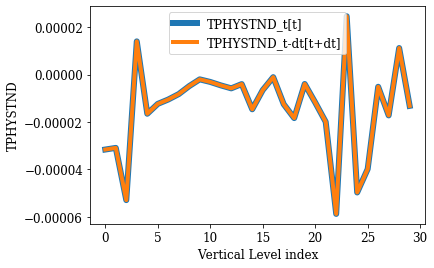

In [56]:
plt.plot(TPHYSTND_t[idx,:],label='TPHYSTND_t[t]',linewidth=1.5*lw)
plt.plot(TPHYSTND_tdt[idx+8192,:],label='TPHYSTND_t-dt[t+dt]')
plt.xlabel('Vertical Level index')
plt.ylabel('TPHYSTND')
plt.legend()

In [57]:
idx = 9875

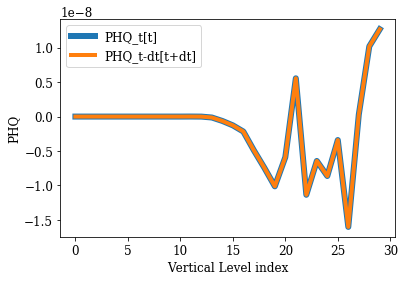

In [58]:
plt.plot(PHQ_t[idx,:],label='PHQ_t[t]',linewidth=1.5*lw)
plt.plot(PHQ_tdt[idx+8192,:],label='PHQ_t-dt[t+dt]')
plt.xlabel('Vertical Level index')
plt.ylabel('PHQ')
plt.legend()

## Check that at a given level, the time series of the tendencies[t-dt] lag the time series of the tendencies[t] by 1

In [59]:
ilev = 15

In [63]:
idx = 5025 + 8192*np.arange(0,50)

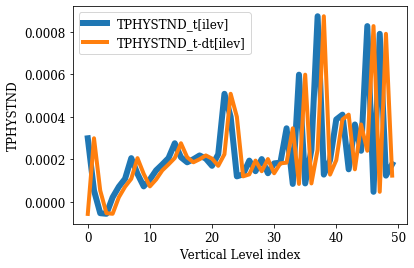

In [66]:
plt.plot(TPHYSTND_t[idx,ilev],label='TPHYSTND_t[ilev]',linewidth=1.5*lw)
plt.plot(TPHYSTND_tdt[idx,ilev],label='TPHYSTND_t-dt[ilev]')
plt.xlabel('Vertical Level index')
plt.ylabel('TPHYSTND')
plt.legend()

In [67]:
idx = 1025 + 8192*np.arange(0,50)

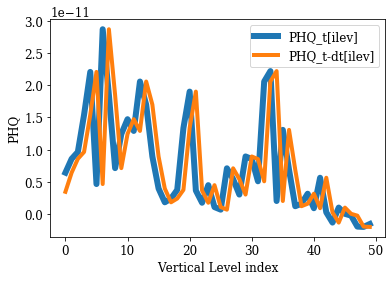

In [68]:
plt.plot(PHQ_t[idx,ilev],label='PHQ_t[ilev]',linewidth=1.5*lw)
plt.plot(PHQ_tdt[idx,ilev],label='PHQ_t-dt[ilev]')
plt.xlabel('Vertical Level index')
plt.ylabel('PHQ')
plt.legend()